In [2]:
import pandas as pd

In [3]:
co2 = pd.read_csv('co2.csv', sep ='\t')
co2.head()

data   media
0  1980.042  338.45
1  1980.125  339.15
2  1980.208  339.48
3  1980.292  339.87
4  1980.375  340.30

Text(0.5, 0, 'Data')

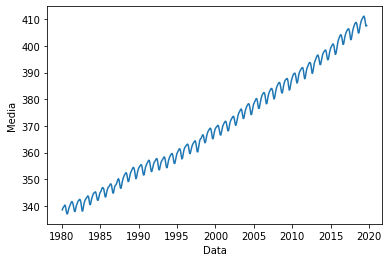

In [4]:
import matplotlib.pyplot as plt

plt.plot(co2['data'], co2['media'])
plt.ylabel('Media')
plt.xlabel('Data')

In [5]:
nasc = pd.read_csv('nascimentos.csv')
nasc.head()

data  n_nasc
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44

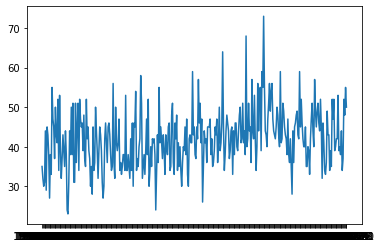

In [6]:
plt.plot(nasc['data'], nasc['n_nasc'])

In [7]:
nasc['data'] = pd.to_datetime(nasc['data'])

Text(0.5, 0, 'Data')

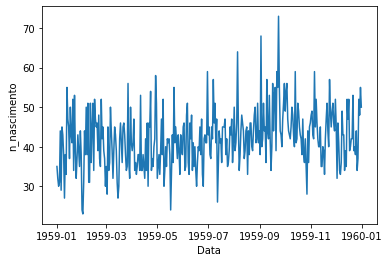

In [8]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(nasc['data'], nasc['n_nasc'])
plt.ylabel('n_nascimento')
plt.xlabel('Data')

Text(0.5, 0, 'data')

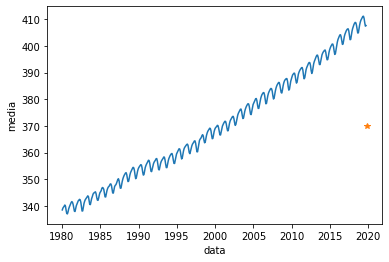

In [9]:
## Calculando o próximo ponto

import numpy as np

media_carb = np.mean(co2['media'])
dt_carb = co2['data'][1] - co2['data'][0] ## Intervalo de datas

# Plotando o grafico
plt.plot(co2['data'], co2['media'])
plt.plot(co2.iloc[-1,0] + dt_carb, media_carb, "*")
plt.ylabel('media')
plt.xlabel('data')


Text(0.5, 0, 'data')

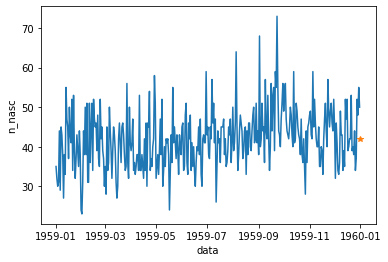

In [10]:


media_nasc = np.mean(nasc['n_nasc'])
dt_nasc = nasc['data'][1] - nasc['data'][0]

plt.plot(nasc['data'], nasc['n_nasc'])
plt.plot(nasc.iloc[-1,0] + dt_nasc, media_nasc, "*")
plt.ylabel('n_nasc')
plt.xlabel('data')

In [11]:
## Estimando a média dos tres ultimos pontos

co2.shape ## Verificar a quantidade de itens

(477, 2)

Text(0, 0.5, 'media')

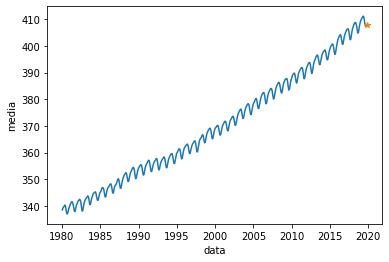

In [12]:
media_tres_pontos_c = np.mean(co2['media'][474:476])
                             
plt.plot(co2['data'], co2['media'])
plt.plot(co2.iloc[-1,0] +dt_carb, media_tres_pontos_c, "*")
plt.xlabel('data')
plt.ylabel('media')

In [13]:
nasc.shape

(365, 2)

Text(0.5, 0, 'data')

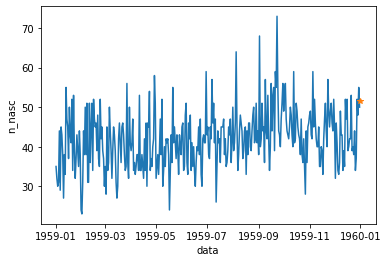

In [14]:
media_tres_pontos_n = np.mean(nasc['n_nasc'][362:364])
plt.plot(nasc['data'], nasc['n_nasc'])
plt.plot(nasc.iloc[-1,0] + dt_nasc, media_tres_pontos_n, "*")
plt.ylabel('n_nasc')
plt.xlabel('data')

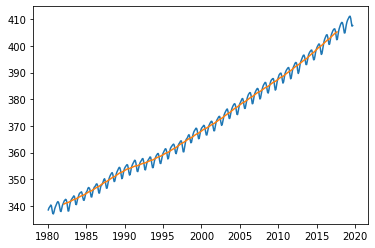

In [15]:
## Trabalhando com média movel

media_movel_c = co2.rolling(50).mean()
plt.plot(co2['data'], co2['media'])
plt.plot(media_movel_c['data'], media_movel_c['media'])

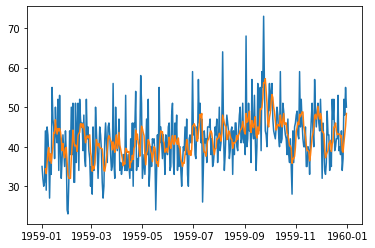

In [16]:
media_movel_n = nasc.rolling(5).mean()
plt.plot(nasc['data'], nasc['n_nasc'])
plt.plot(nasc['data'], media_movel_n['n_nasc'])

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

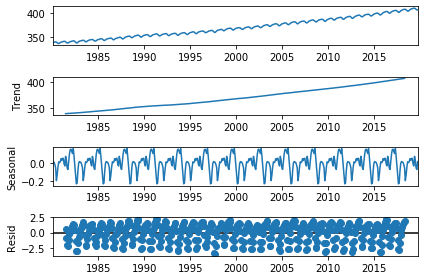

In [18]:
result_c = seasonal_decompose(co2.set_index('data'), period = 35)

result_c.plot();

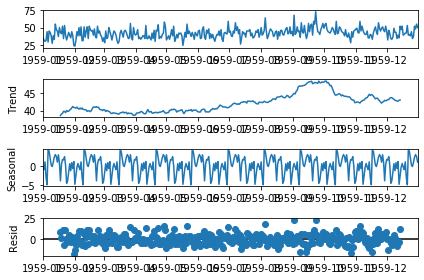

In [19]:
result_n = seasonal_decompose(nasc.set_index('data'), period = 35)
result_n.plot();

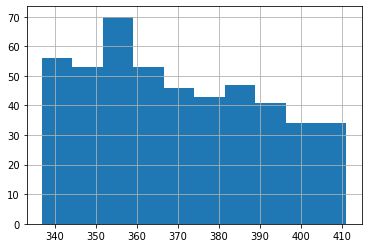

In [20]:
## Dados estacionarios == distribuicao normal

co2['media'].hist()

In [21]:
divide = int(len(co2) / 2)
x = co2['media'].values

In [22]:
c1, c2 = x[0:divide], x[divide:]

In [23]:
c1.mean()

352.31550420168065

In [24]:
c2.mean()

387.816359832636

In [25]:
c1.var()

73.90219533401597

In [26]:
c2.var()

151.542490933282

In [27]:
## Base nascimento

divide = int(len(nasc) / 2)
x = nasc['n_nasc'].values

n1, n2 = x[0:divide], x[divide:]

In [28]:
n1.mean()

39.76373626373626

In [29]:
n2.mean()

44.185792349726775

In [30]:
n1.var()

49.21341021615746

In [31]:
n2.var()

48.708650601690096

In [32]:
## ADFULLER
## Quanto mais negativo for, mais estacionaria é a serie
## p-valor

from statsmodels.tsa.stattools import adfuller

resultado_c = adfuller(co2['media'].values)

print('Estatistica ADF', resultado_c[0])

Estatistica ADF 3.0368288291669945


In [33]:
resultado_n = adfuller(nasc['n_nasc'].values)
resultado_n[0]

-4.808291253559761

In [34]:
co2 = co2.set_index('data')

In [41]:


co2_treino = co2[1980.042: 2015]
co_teste = co2[2015:]

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

modelo_ajustado = SimpleExpSmoothing(co2_treino).fit(smoothing_level = 0.5)

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [40]:
# ver o tamanho da base para saber quantos pontos vamos prever

co_teste.shape

(57, 1)

In [42]:
modelo_previsto = modelo_ajustado.forecast(57)

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


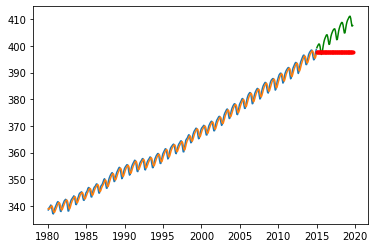

In [47]:
plt.plot(co2_treino) ## Grafico dos dados originais
plt.plot(co2_treino.index, modelo_ajustado.fittedvalues.values) ## Modelo ajustado aos dados

plt.plot(co_teste, 'g')
plt.plot(co_teste.index, modelo_previsto, 'r.')

In [48]:
nasc = nasc.set_index('data')

In [49]:
nasc_treino = nasc['1959-01-01' : '1959-12-01']

In [50]:
nasc_teste = nasc['1959-12-01' :]

In [51]:
modelo_ajustado = SimpleExpSmoothing(nasc_treino).fit(smoothing_level = 0.5)

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [52]:
nasc_teste.shape[0]

31

In [53]:
modelo_previsto = modelo_ajustado.forecast(31)

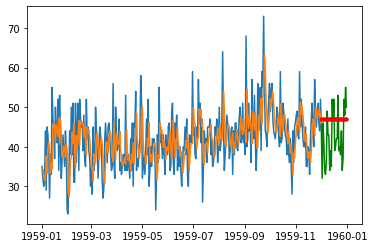

In [54]:
plt.plot(nasc_treino)
plt.plot(nasc_treino.index, modelo_ajustado.fittedvalues.values)
plt.plot(nasc_teste, 'g')
plt.plot(nasc_teste.index, modelo_previsto, 'r.')

In [57]:
## HoltWinters

from statsmodels.tsa.holtwinters import ExponentialSmoothing

modelo_ajustado = ExponentialSmoothing(co2_treino.values, trend='additive', 
                                      seasonal = 'additive', seasonal_periods = 35).fit()

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [60]:
co_teste.shape

(57, 1)

In [61]:
modelo_previsto = modelo_ajustado.predict(start=420, end = 476)

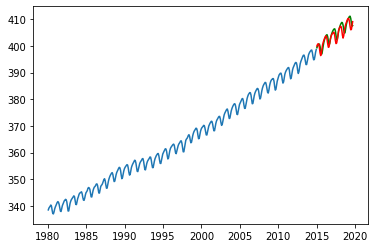

In [65]:
plt.plot(co2_treino)
plt.plot(co_teste, 'g')
plt.plot(co_teste.index, modelo_previsto, 'r')